<a href="https://colab.research.google.com/github/HenriqueCF8896/MNCM/blob/main/Programa7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite os valores de n desejados (separados por espaço): 3 5 7 9 11 16 25 64

  n   Trapézio   Simpson1/3   Simpson3/8
  3    53.0000      58.6667          nan
  5    57.2500      58.6667          nan
  7    58.0370      58.6667      58.6667
  9    58.3125      58.6667          nan
 11    58.4400      58.6667          nan
 16    58.5659          nan      58.6667
 25    58.6273      58.6667      58.6667
 64    58.6610          nan      58.6667


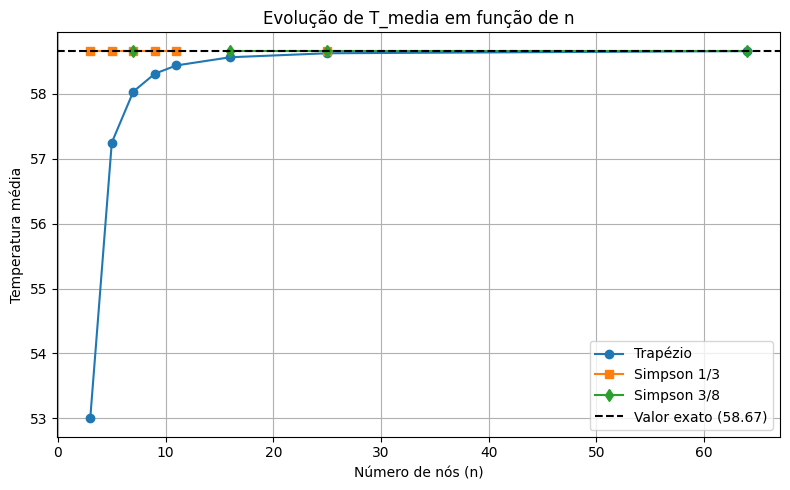

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função T(x,y)
def T(x,y):
    return 2*x*y + 2*x - x**2 - 2*y**2 + 72

# Trapézio unidimensional
def trapz_1d(f,h):
    return h * (0.5*f[0] + np.sum(f[1:-1]) + 0.5*f[-1])

# Simpson 1/3 unidimensional
def simpson13_1d(f,h):
    n = len(f)
    if n % 2 == 0:
        raise ValueError("Simpson 1/3 requer número ímpar de pontos.")
    return h/3 * (f[0] + 4*np.sum(f[1:-1:2]) + 2*np.sum(f[2:-2:2]) + f[-1])

# Simpson 3/8 unidimensional
def simpson38_1d(f,h):
    n = len(f)
    if (n-1)%3 != 0:
        raise ValueError("Simpson 3/8 requer (n-1) múltiplo de 3.")
    I = f[0] + f[-1]
    I += 3 * np.sum(f[1:-1][(np.arange(1,n-1)%3 != 0)])
    I += 2 * np.sum(f[3:-3:3])
    return 3*h/8 * I

# Temperatura média por método
def T_media_trapezio(X,Y,Txy,Lx,Ly):
    dy = Ly / (len(Y)-1)
    dx = Lx / (len(X[0])-1)
    integral_y = np.array([trapz_1d(Txy[:,i],dy) for i in range(len(X[0]))])
    integral_xy = trapz_1d(integral_y,dx)
    return integral_xy / (Lx*Ly)

def T_media_simpson13(X,Y,Txy,Lx,Ly):
    dy = Ly / (len(Y)-1)
    dx = Lx / (len(X[0])-1)
    integral_y = np.array([simpson13_1d(Txy[:,i],dy) for i in range(len(X[0]))])
    integral_xy = simpson13_1d(integral_y,dx)
    return integral_xy / (Lx*Ly)

def T_media_simpson38(X,Y,Txy,Lx,Ly):
    dy = Ly / (len(Y)-1)
    dx = Lx / (len(X[0])-1)
    integral_y = np.array([simpson38_1d(Txy[:,i],dy) for i in range(len(X[0]))])
    integral_xy = simpson38_1d(integral_y,dx)
    return integral_xy / (Lx*Ly)

# Programa principal
def main():
    Lx = 8
    Ly = 6

    # Entrada de lista de n's
    n_input = input("Digite os valores de n desejados (separados por espaço): ")
    n_list = [int(v) for v in n_input.strip().split()]

    T_trap_list = []
    T_simp13_list = []
    T_simp38_list = []

    print(f"\n{'n':>3} {'Trapézio':>10} {'Simpson1/3':>12} {'Simpson3/8':>12}")

    for n in n_list:
        x = np.linspace(0, Lx, n)
        y = np.linspace(0, Ly, n)
        X,Y = np.meshgrid(x,y)
        Txy = T(X,Y)

        # Trapézio
        try:
            T_trap = T_media_trapezio(X,Y,Txy,Lx,Ly)
        except:
            T_trap = np.nan
        T_trap_list.append(T_trap)

        # Simpson 1/3
        if n % 2 == 1:
            try:
                T_simp13 = T_media_simpson13(X,Y,Txy,Lx,Ly)
            except:
                T_simp13 = np.nan
        else:
            T_simp13 = np.nan
        T_simp13_list.append(T_simp13)

        # Simpson 3/8
        if (n-1)%3 == 0:
            try:
                T_simp38 = T_media_simpson38(X,Y,Txy,Lx,Ly)
            except:
                T_simp38 = np.nan
        else:
            T_simp38 = np.nan
        T_simp38_list.append(T_simp38)

        # Exibe tabela linha a linha
        print(f"{n:>3} {T_trap:10.4f} {T_simp13:12.4f} {T_simp38:12.4f}")

    # Gráfico comparativo
    plt.figure(figsize=(8,5))
    plt.plot(n_list, T_trap_list, 'o-', label='Trapézio')
    plt.plot(n_list, T_simp13_list, 's-', label='Simpson 1/3')
    plt.plot(n_list, T_simp38_list, 'd-', label='Simpson 3/8')
    plt.axhline(58.6667, color='k', linestyle='--', label='Valor exato (58.67)')
    plt.xlabel('Número de nós (n)')
    plt.ylabel('Temperatura média')
    plt.title('Evolução de T_media em função de n')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
